Find the number of peaks inside the amplitudes when they follow the following rules. 
- Amplitudes are real numbers
- Every mountain is accompanied by a valley ( complete sin wave. )

The following piece of code below represents a sine wave when has fs sampling with T time and frequency_sine. <br>
The plots represent below the generated points. 


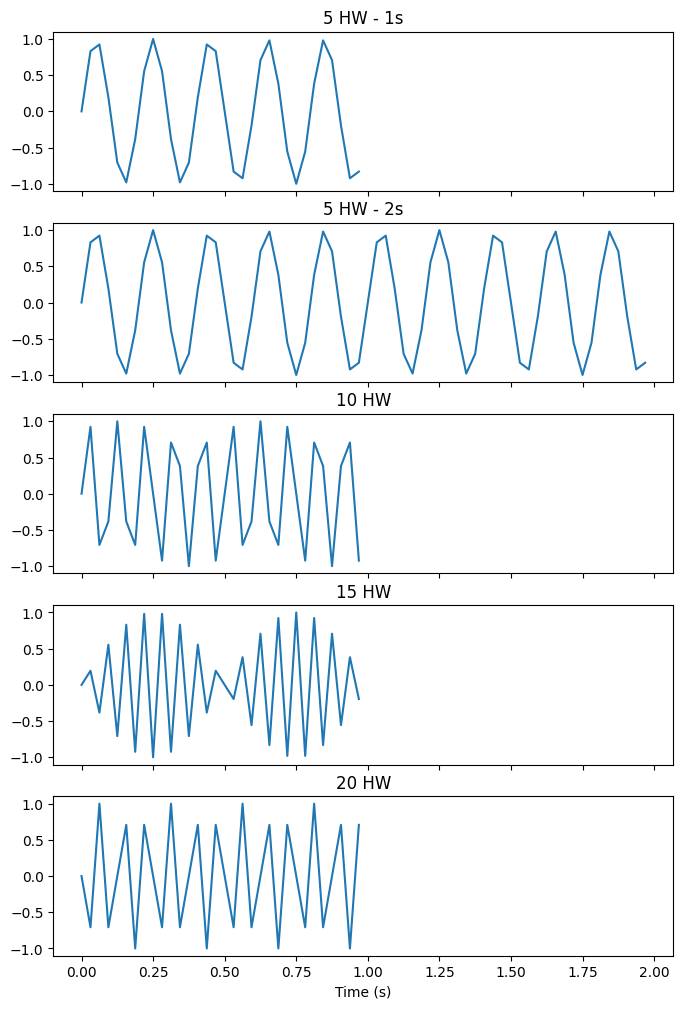

In [233]:
import numpy as np 
import json
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

def sin_wave_points(fs, T, frequency_sine):
    time = np.linspace(0, T, T * fs, endpoint=False)
    sine_wave = np.sin(2 * np.pi * frequency_sine * time)
    time = np.linspace(0, T, T * fs, endpoint=False)
    return sine_wave, time

sine_wave_1000HW_1s, time_1000HZ_1s = sin_wave_points(32, 1, 5)
sine_wave_1000HW_2s, time_1000HZ_2s = sin_wave_points(32, 2, 5)
sine_wave_1000_10HW_1s, time_1000_10HZ_1s = sin_wave_points(32, 1, 10)
sine_wave_1000_15HW_1s, time_1000_15HZ_1s = sin_wave_points(32, 1, 15)
sine_wave_1000_20HW_1s, time_1000_20HZ_1s = sin_wave_points(32, 1, 20)

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(8, 12))
axs[0].plot(time_1000HZ_1s, sine_wave_1000HW_1s)
axs[0].set_title('5 HW - 1s')

axs[1].plot(time_1000HZ_2s, sine_wave_1000HW_2s)
axs[1].set_title('5 HW - 2s')

axs[2].plot(time_1000_10HZ_1s, sine_wave_1000_10HW_1s)
axs[2].set_title('10 HW')

axs[3].plot(time_1000_15HZ_1s, sine_wave_1000_15HW_1s)
axs[3].set_title('15 HW')

axs[4].plot(time_1000_20HZ_1s, sine_wave_1000_20HW_1s)
axs[4].set_title('20 HW')

plt.xlabel('Time (s)')
plt.show()

amplitudes_5HZ = np.round(sine_wave_1000HW_1s/np.linalg.norm(sine_wave_1000HW_1s),10).tolist()
amplitudes_5HZ = "[" + ', '.join([str(i) for i in amplitudes_5HZ]) + "]"

amplitudes_5HZ_2 = np.round(sine_wave_1000HW_2s/np.linalg.norm(sine_wave_1000HW_2s),10).tolist()
amplitudes_5HZ_2 = "[" + ', '.join([str(i) for i in amplitudes_5HZ_2]) + "]"

amplitudes_10HZ = np.round(sine_wave_1000_10HW_1s/np.linalg.norm(sine_wave_1000_10HW_1s),10).tolist()
amplitudes_10HZ = "[" + ', '.join([str(i) for i in amplitudes_10HZ]) + "]"

amplitudes_15HZ = np.round(sine_wave_1000_15HW_1s/np.linalg.norm(sine_wave_1000_15HW_1s),10).tolist()
amplitudes_15HZ = "[" + ', '.join([str(i) for i in amplitudes_15HZ]) + "]"

amplitudes_20HZ = np.round(sine_wave_1000_20HW_1s/np.linalg.norm(sine_wave_1000_20HW_1s),10).tolist()
amplitudes_20HZ = "[" + ', '.join([str(i) for i in amplitudes_20HZ]) + "]"

If we feed list of amplitudes hence generated into a QFT circuit, it will move the amplitudes into the frequency domain which will give the frequency for which these points are generated. <br>
The circuit then represents two amplitudes, HZ and number of states - HZ. 

For example, if we have 32 amplitudes representing a 32 sample size for 1 sec ( or 64 sample size for 2 s), it will fit into 5 qubits. <br>
In the circuit below, the last qubit is used to find out the correctness of the label hence 2^n + 1 The two values after QFT procesinng will be 5 HZ and 32-5 = 27. 

A MultiControlledX gate is used to represent these two qubits. 

Running test case 0 with input '[6,[0.0, 0.2078674031, 0.2309698831, 0.0487725805, -0.1767766953, -0.2451963201, -0.0956708581, 0.1388925583, 0.25, 0.1388925583, -0.0956708581, -0.2451963201, -0.1767766953, 0.0487725805, 0.2309698831, 0.2078674031, 0.0, -0.2078674031, -0.2309698831, -0.0487725805, 0.1767766953, 0.2451963201, 0.0956708581, -0.1388925583, -0.25, -0.1388925583, 0.0956708581, 0.2451963201, 0.1767766953, -0.0487725805, -0.2309698831, -0.2078674031],5]'...
11 0.70711j
55 (-0-0.70711j)
Correct!
Running test case 1 with input '[7,[0.0, 0.1469844503, 0.1633203706, 0.0344874224, -0.125, -0.1733799807, -0.0676495125, 0.0982118698, 0.1767766953, 0.0982118698, -0.0676495125, -0.1733799807, -0.125, 0.0344874224, 0.1633203706, 0.1469844503, 0.0, -0.1469844503, -0.1633203706, -0.0344874224, 0.125, 0.1733799807, 0.0676495125, -0.0982118698, -0.1767766953, -0.0982118698, 0.0676495125, 0.1733799807, 0.125, -0.0344874224, -0.1633203706, -0.1469844503, -0.0, 0.1469844503, 0.1633203706, 0.0

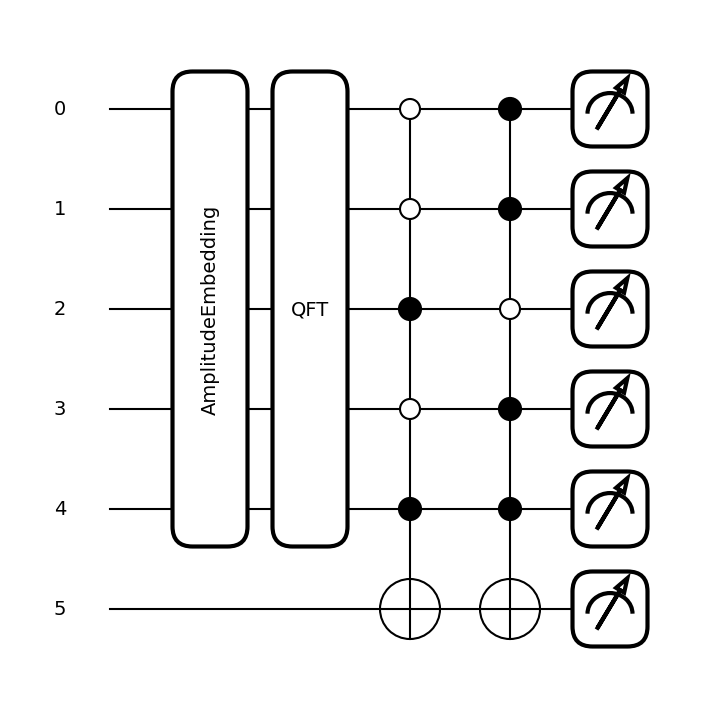

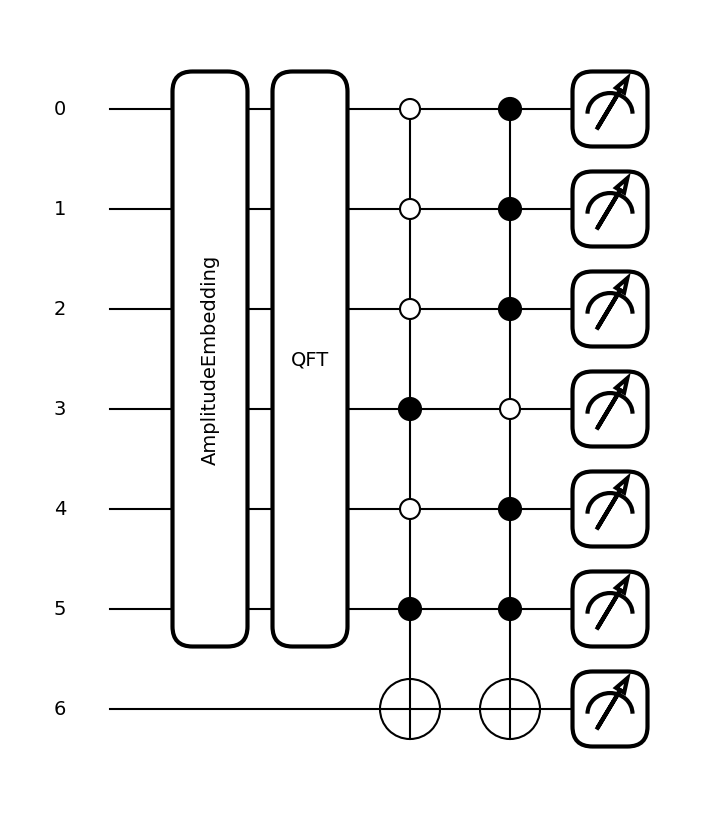

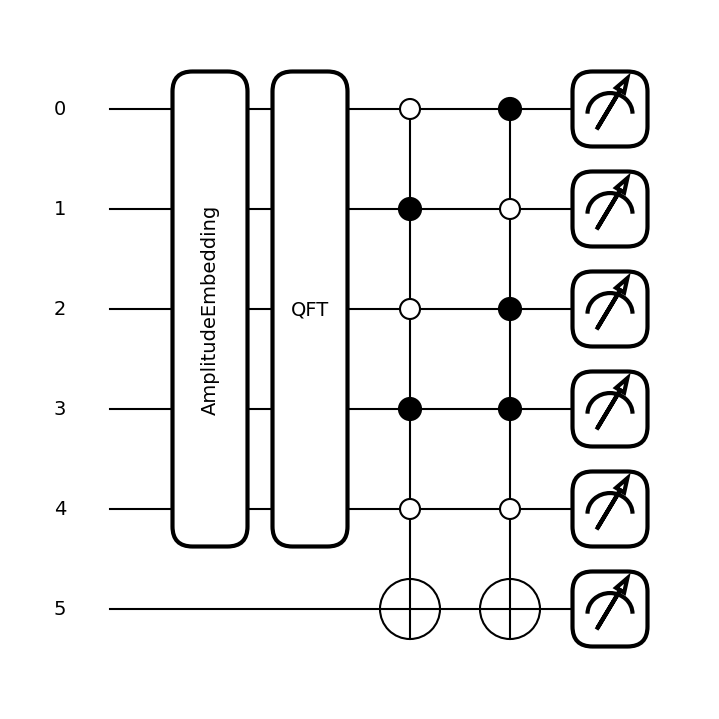

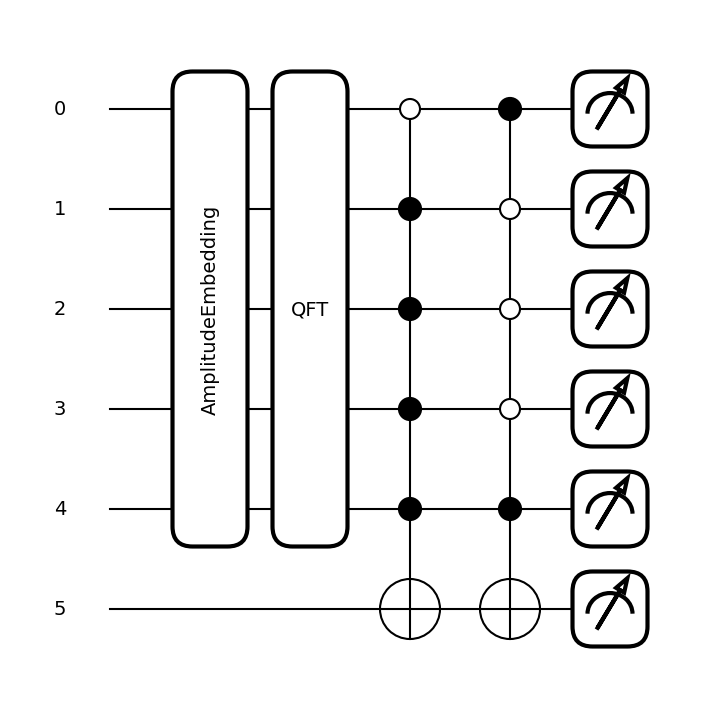

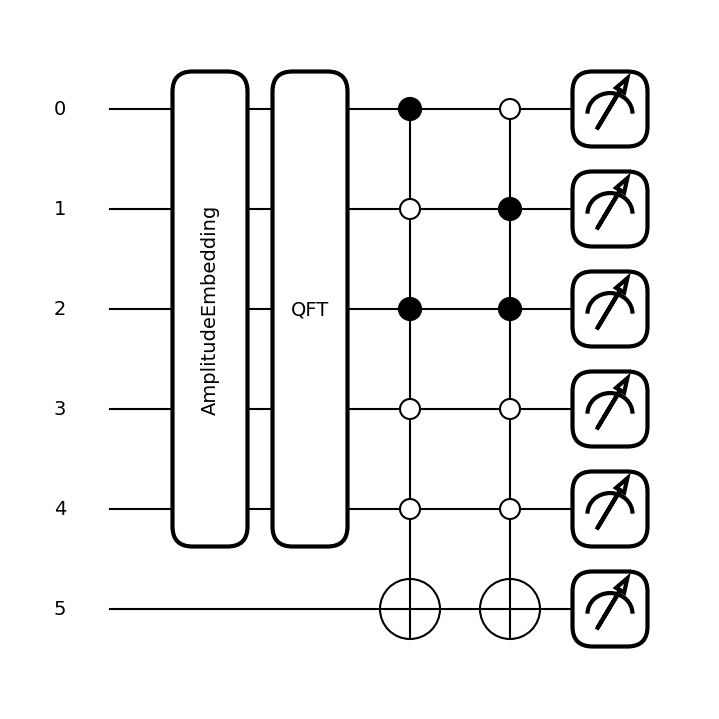

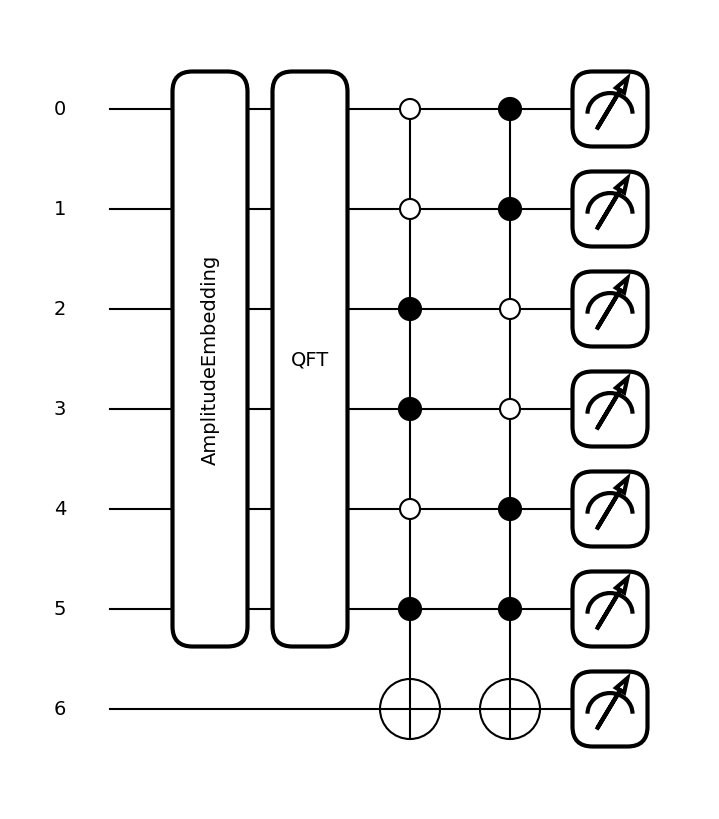

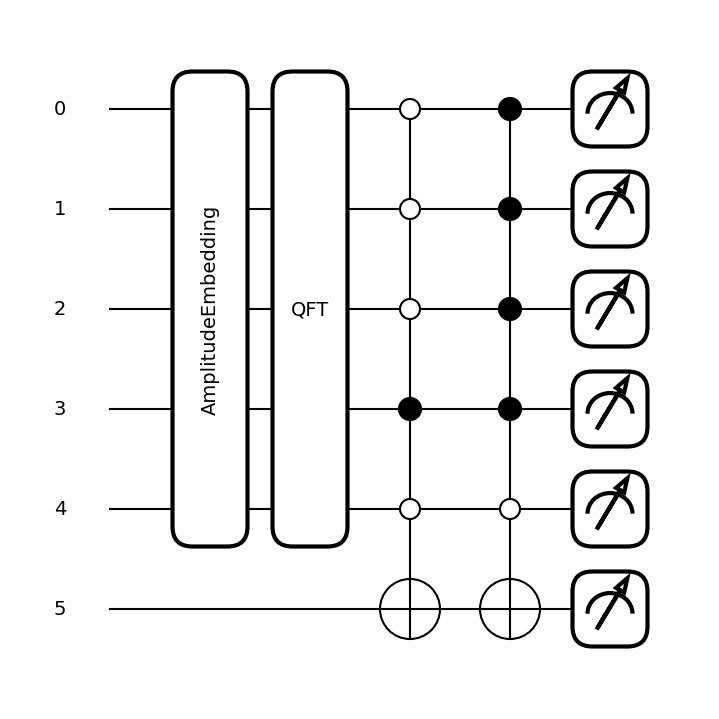

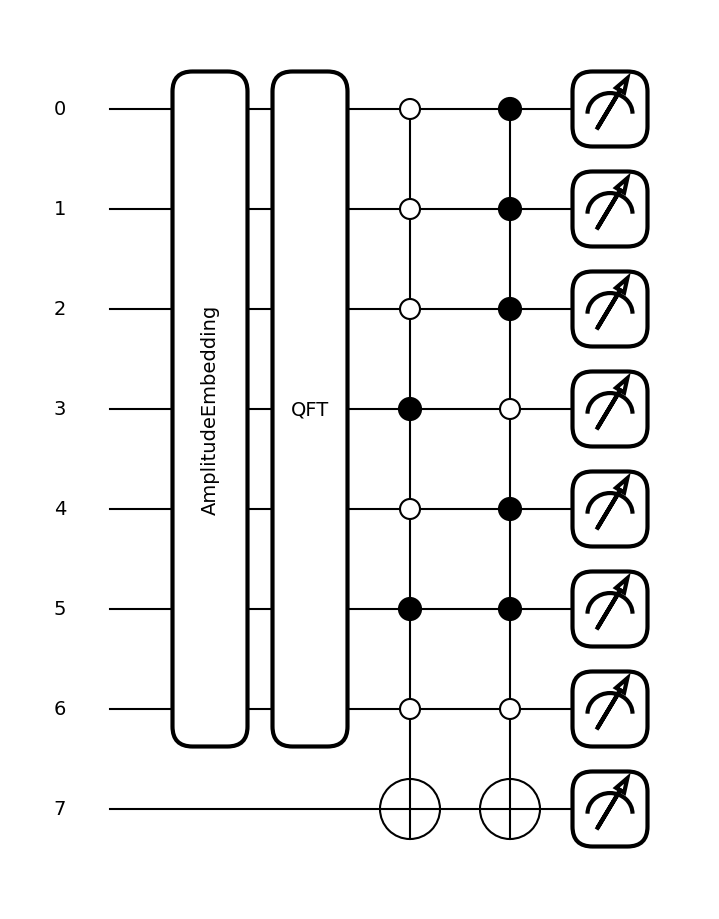

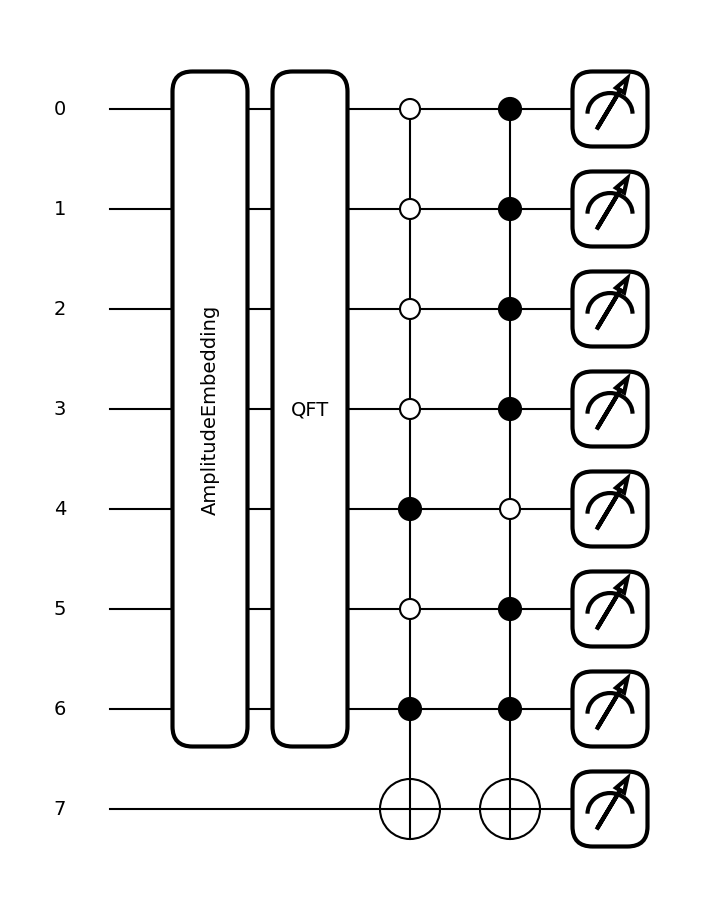

In [241]:
def U(n_wires, label):
    work_wires = range(0, n_wires-1)
    nww = len(work_wires)
    # Move the values into freq domain
    qml.QFT(wires=work_wires)
    
    # add multi-controlled x to check the frequecy. 
    blabel = bin(label)[2:]
    blabel = '0'*(nww-len(blabel)) + blabel
    qml.MultiControlledX(wires = range(n_wires), control_values=blabel)

    diff_label = bin(2**(nww)-label)[2:]
    diff_label = '0'*(nww-len(diff_label)) + diff_label
    qml.MultiControlledX(wires = range(n_wires), control_values=diff_label)

def round_if_close(x):
    if round(x,3) == 0.0:
        return 0
    elif round(x,3) == 1.0:
        return 1
    else:
        return 0.5

def run(test_case_input: str) -> str:
    inputs = json.loads(test_case_input)
    n_wires = int(inputs[0])
    phi = np.array(inputs[1])
    label = int(inputs[2])

    dev = qml.device("default.qubit", wires = n_wires)

    @qml.qnode(dev)
    def circuit():
        qml.AmplitudeEmbedding(phi, wires = range(n_wires-1))
        U(n_wires, label)
        return qml.state()

    c = np.round(circuit(),5)
    for k,v in enumerate(c):
        if v != 0:
            print (k, v)

    qml.draw_mpl(circuit)()

    return c


def check(solution_output: str, expected_output: str) -> None:
    
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert(np.isclose(solution_output, 0.) or np.isclose(solution_output, 1.)), "Make sure that with one shot you always get the same output"
 
    assert solution_output == expected_output, "The function did not predict the result correctly"


# These are the public test cases
test_cases = [
    ('[6,' + amplitudes_5HZ + ',5]', 1),
    ('[7,' + amplitudes_5HZ_2 + ',5]', 1),
    ('[6,' + amplitudes_10HZ + ',10]', 1),
    ('[6,' + amplitudes_15HZ + ',15]', 1),
    ('[6,' + amplitudes_20HZ + ',20]', 1),
    ('[7, [0.0, 0.1691647501467941, 0.09821186979838777, -0.11214594829282956, -0.16332037060954704, 0.017327146149886487, 0.17337998066526847, 0.08333195730971811, -0.12500000000000008, -0.15590312662333394, 0.034487422410367986, 0.17592546719079785, 0.06764951251827452, -0.13665023337521967, -0.1469844503024196, 0.05131556594029498, 0.1767766952966369, 0.05131556594029465, -0.1469844503024198, -0.13665023337521948, 0.06764951251827482, 0.1759254671907978, 0.034487422410367334, -0.1559031266233341, -0.12499999999999982, 0.08333195730971842, 0.17337998066526844, 0.01732714614988661, -0.16332037060954743, -0.11214594829282894, 0.09821186979838831, 0.16916475014679394, -3.466012651969747e-16, -0.16916475014679414, -0.09821186979838774, 0.11214594829282946, 0.16332037060954718, -0.017327146149887302, -0.17337998066526858, -0.0833319573097178, 0.1250000000000003, 0.15590312662333378, -0.03448742241036802, -0.17592546719079782, -0.06764951251827361, 0.1366502333752203, 0.1469844503024194, -0.051315565940295314, -0.1767766952966369, -0.051315565940294315, 0.14698445030241997, 0.13665023337521884, -0.06764951251827457, -0.1759254671907977, -0.03448742241036823, 0.15590312662333428, 0.12499999999999868, -0.08333195730971872, -0.17337998066526814, -0.017327146149886268, 0.16332037060954757, 0.11214594829282964, -0.0982118697983886, -0.16916475014679422], 13]', '1'),
    ('[6, [0.0, 0.13889255825490054, 0.23096988312782168, 0.2451963201008076, 0.17677669529663692, 0.04877258050403215, -0.09567085809127242, -0.2078674030756363, -0.25, -0.20786740307563636, -0.0956708580912726, 0.04877258050403206, 0.17677669529663684, 0.24519632010080758, 0.23096988312782168, 0.13889255825490057, 9.18485099360515e-17, -0.13889255825490043, -0.2309698831278216, -0.24519632010080764, -0.17677669529663712, -0.04877258050403202, 0.09567085809127245, 0.20786740307563623, 0.25, 0.20786740307563645, 0.09567085809127268, -0.04877258050403175, -0.17677669529663692, -0.24519632010080752, -0.2309698831278217, -0.13889255825490102], 2]', '0'),
    ('[8, [0.0, 0.030372522487907984, 0.058924592103249705, 0.08394486935587729, 0.10393370153781815, 0.1176930081478776, 0.12439809083402459, 0.12364706374559761, 0.11548494156391084, 0.10040094143508062, 0.07929916052045569, 0.053444386678785254, 0.024386290252016076, -0.006133459290927216, -0.036285584656807764, -0.0642628430241527, -0.08838834764831843, -0.107216076250034, -0.1196175419665261, -0.12484943202564655, -0.1225981600504038, -0.11299866164043042, -0.0966263066703421, -0.07446241306155416, -0.0478354290456363, -0.0183413093069203, 0.012252142541195003, 0.042111231674027444, 0.06944627912745023, 0.09261889066936985, 0.11024015804354435, 0.12125390664931798, 0.125, 0.12125390664931804, 0.1102401580435444, 0.09261889066936997, 0.06944627912745029, 0.04211123167402762, 0.012252142541195079, -0.01834130930692011, -0.04783542904563623, -0.07446241306155409, -0.09662630667034214, -0.11299866164043038, -0.12259816005040382, -0.12484943202564655, -0.1196175419665261, -0.10721607625003404, -0.08838834764831856, -0.06426284302415276, -0.036285584656807944, -0.006133459290927292, 0.024386290252015892, 0.05344438667878523, 0.07929916052045559, 0.10040094143508059, 0.1154849415639108, 0.12364706374559761, 0.12439809083402462, 0.1176930081478776, 0.10393370153781822, 0.08394486935587729, 0.05892459210324979, 0.03037252248790796, 7.654042494670958e-17, -0.030372522487907814, -0.05892459210324945, -0.08394486935587718, -0.10393370153781811, -0.11769300814787761, -0.12439809083402459, -0.12364706374559764, -0.11548494156391086, -0.10040094143508056, -0.07929916052045588, -0.05344438667878537, -0.02438629025201604, 0.00613345929092736, 0.03628558465680759, 0.06426284302415262, 0.08838834764831846, 0.10721607625003385, 0.11961754196652606, 0.12484943202564655, 0.1225981600504038, 0.11299866164043053, 0.09662630667034224, 0.07446241306155421, 0.047835429045636174, 0.018341309306920482, -0.012252142541194926, -0.04211123167402748, -0.06944627912745034, -0.09261889066936971, -0.11024015804354433, -0.121253906649318, -0.125, -0.12125390664931805, -0.11024015804354442, -0.09261889066936987, -0.06944627912745054, -0.042111231674027694, -0.012252142541195154, 0.018341309306920257, 0.04783542904563596, 0.07446241306155403, 0.09662630667034208, 0.11299866164043043, 0.12259816005040375, 0.12484943202564655, 0.11961754196652612, 0.10721607625003396, 0.08838834764831861, 0.06426284302415283, 0.036285584656807805, 0.00613345929092759, -0.024386290252015816, -0.05344438667878517, -0.0792991605204557, -0.10040094143508042, -0.11548494156391079, -0.12364706374559761, -0.12439809083402459, -0.1176930081478777, -0.10393370153781825, -0.08394486935587735, -0.05892459210324966, -0.03037252248790825] ,10]', '0'),
    ('[8, [0.0, 0.030372522487907984, 0.058924592103249705, 0.08394486935587729, 0.10393370153781815, 0.1176930081478776, 0.12439809083402459, 0.12364706374559761, 0.11548494156391084, 0.10040094143508062, 0.07929916052045569, 0.053444386678785254, 0.024386290252016076, -0.006133459290927216, -0.036285584656807764, -0.0642628430241527, -0.08838834764831843, -0.107216076250034, -0.1196175419665261, -0.12484943202564655, -0.1225981600504038, -0.11299866164043042, -0.0966263066703421, -0.07446241306155416, -0.0478354290456363, -0.0183413093069203, 0.012252142541195003, 0.042111231674027444, 0.06944627912745023, 0.09261889066936985, 0.11024015804354435, 0.12125390664931798, 0.125, 0.12125390664931804, 0.1102401580435444, 0.09261889066936997, 0.06944627912745029, 0.04211123167402762, 0.012252142541195079, -0.01834130930692011, -0.04783542904563623, -0.07446241306155409, -0.09662630667034214, -0.11299866164043038, -0.12259816005040382, -0.12484943202564655, -0.1196175419665261, -0.10721607625003404, -0.08838834764831856, -0.06426284302415276, -0.036285584656807944, -0.006133459290927292, 0.024386290252015892, 0.05344438667878523, 0.07929916052045559, 0.10040094143508059, 0.1154849415639108, 0.12364706374559761, 0.12439809083402462, 0.1176930081478776, 0.10393370153781822, 0.08394486935587729, 0.05892459210324979, 0.03037252248790796, 7.654042494670958e-17, -0.030372522487907814, -0.05892459210324945, -0.08394486935587718, -0.10393370153781811, -0.11769300814787761, -0.12439809083402459, -0.12364706374559764, -0.11548494156391086, -0.10040094143508056, -0.07929916052045588, -0.05344438667878537, -0.02438629025201604, 0.00613345929092736, 0.03628558465680759, 0.06426284302415262, 0.08838834764831846, 0.10721607625003385, 0.11961754196652606, 0.12484943202564655, 0.1225981600504038, 0.11299866164043053, 0.09662630667034224, 0.07446241306155421, 0.047835429045636174, 0.018341309306920482, -0.012252142541194926, -0.04211123167402748, -0.06944627912745034, -0.09261889066936971, -0.11024015804354433, -0.121253906649318, -0.125, -0.12125390664931805, -0.11024015804354442, -0.09261889066936987, -0.06944627912745054, -0.042111231674027694, -0.012252142541195154, 0.018341309306920257, 0.04783542904563596, 0.07446241306155403, 0.09662630667034208, 0.11299866164043043, 0.12259816005040375, 0.12484943202564655, 0.11961754196652612, 0.10721607625003396, 0.08838834764831861, 0.06426284302415283, 0.036285584656807805, 0.00613345929092759, -0.024386290252015816, -0.05344438667878517, -0.0792991605204557, -0.10040094143508042, -0.11548494156391079, -0.12364706374559761, -0.12439809083402459, -0.1176930081478777, -0.10393370153781825, -0.08394486935587735, -0.05892459210324966, -0.03037252248790825] ,5]', '1')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)
    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if False: #message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")